<a href="https://colab.research.google.com/github/shawakash/Ml-Projects/blob/Pytorch/01_pytorch_workflow_with_MSE_loss_fn_with_Adam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.0.1+cu118'

In [131]:
# y = weights * X + bias

# let
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [132]:
len(X), len(y)

(50, 50)

In [133]:
train_split = int(0.8 * len(X))
train_split

40

In [134]:
X_train, y_train = X[:train_split], y[:train_split]
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [135]:
X_test, y_test = X[train_split:], y[train_split:]

In [136]:
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [137]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

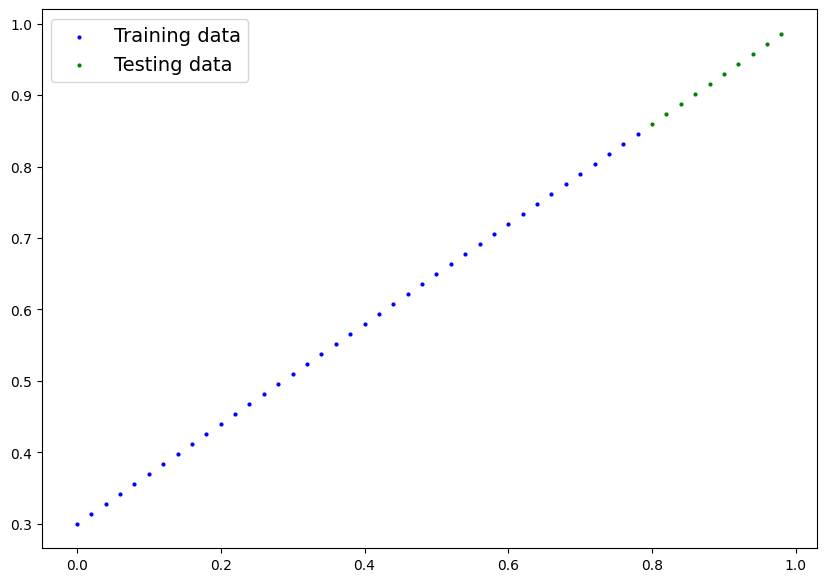

In [138]:
plot_predictions();

In [139]:
import torch
from torch import nn

class LinearRegressionModel(nn.Module):
  def __init__(self):
     super().__init__()
     self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
     self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

     #feed forward

  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
    return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)


In [140]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [141]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [142]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [143]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds, len(y_preds)

(tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]),
 10)

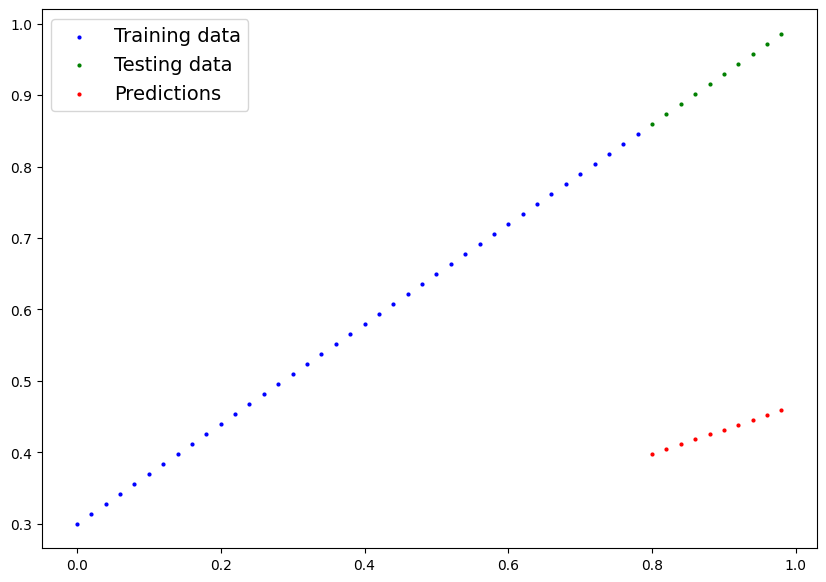

In [144]:
plot_predictions(predictions=y_preds);

In [145]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [146]:
epochs = 300

torch.manual_seed(42)

train_loss_value = []
test_loss_value = []
epoch_count = []

for epoch in range(epochs):
  # set the model to the training mode
  model_0.train()

  # 1. forward pass the data to get the current predicted value
  y_preds = model_0(X_train)

  # 2. Calculate the loss function
  loss = loss_fn(y_preds, y_train)
  # print(f"Loss after {epoch} epochs: {loss}")

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  #5. set the optimizer (perform gradient descent)
  optimizer.step()

  # Testing
  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, y_test.type(torch.float))

  if epoch%10 == 0:
    epoch_count.append(epoch)
    test_loss_value.append(test_loss.detach().numpy())
    train_loss_value.append(loss.detach().numpy())
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")


Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
Epoch: 10 | Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
Epoch: 20 | Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
Epoch: 30 | Loss: 0.053148526698350906 | Test Loss: 0.14464017748832703
Epoch: 40 | Loss: 0.04543796554207802 | Test Loss: 0.11360953003168106
Epoch: 50 | Loss: 0.04167863354086876 | Test Loss: 0.09919948130846024
Epoch: 60 | Loss: 0.03818932920694351 | Test Loss: 0.08886633068323135
Epoch: 70 | Loss: 0.03476089984178543 | Test Loss: 0.0805937647819519
Epoch: 80 | Loss: 0.03132382780313492 | Test Loss: 0.07232122868299484
Epoch: 90 | Loss: 0.02788739837706089 | Test Loss: 0.06473556160926819
Epoch: 100 | Loss: 0.024458957836031914 | Test Loss: 0.05646304413676262
Epoch: 110 | Loss: 0.021020207554101944 | Test Loss: 0.04819049686193466
Epoch: 120 | Loss: 0.01758546568453312 | Test Loss: 0.04060482233762741
Epoch: 130 | Loss: 0.014155393466353416 | Test Loss: 0.03233227878808975
Ep

In [147]:
# y_preds, y_train

In [148]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

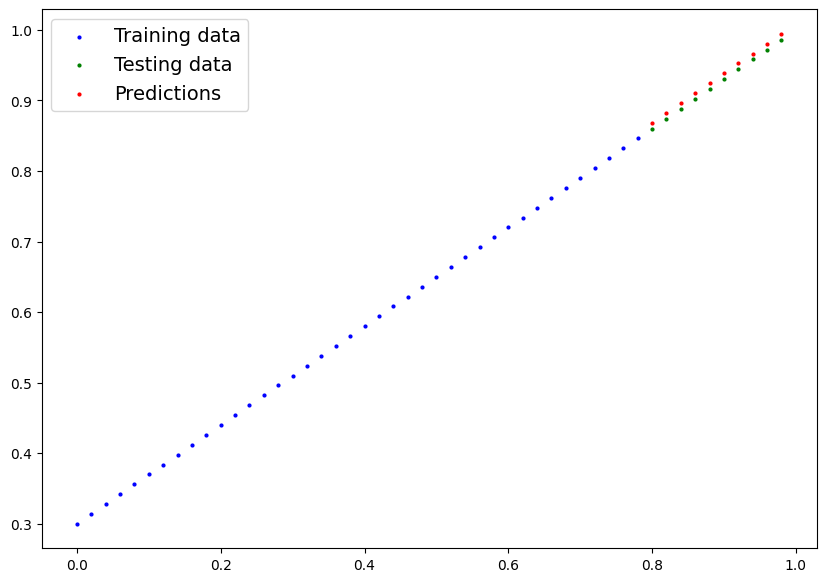

In [149]:
plot_predictions(predictions=y_preds_new);

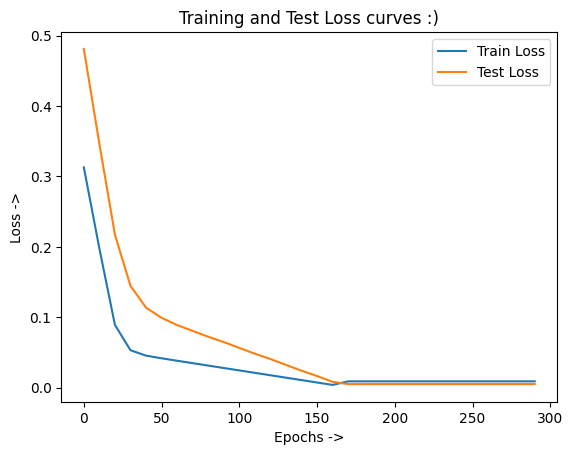

In [150]:
plt.plot(epoch_count, train_loss_value, label="Train Loss")
plt.plot(epoch_count, test_loss_value, label="Test Loss")
plt.title("Training and Test Loss curves :)")
plt.xlabel("Epochs ->")
plt.ylabel("Loss ->")
plt.legend();

In [151]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [152]:
from pathlib import Path

# A model Directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model save path
MODEL_NAME = "01_pytorch_workflow_of_Linear_Regression.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME
MODEL_SAVE_PATH

print(f"Saving Model to {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving Model to models/01_pytorch_workflow_of_Linear_Regression.pth


In [153]:
# Loading the saved model

torch.load(f=MODEL_SAVE_PATH)

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [154]:
# Creating a instance of the model as loaded model

loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [155]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [156]:
# Making Some Predictions
loaded_model_0.eval()

with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [157]:
# Comparing with original model and loaded model
y_preds_new == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [ ]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Setup Device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Creating Datasets
weights = 0.9
bias = 1.2

start = 0.0
end = 1
step = 0.01
X = torch.arange(start, end, step).unsqueeze(dim=1)
len(X)

y = weights * X + bias

split_train = int(0.7 * len(X))

X_train, y_train = X[:split_train], y[:split_train]
X_test, y_test = X[split_train:], y[split_train:]


# Plot Predictions
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, s=4, c="b", label="Training Sets")
  plt.scatter(test_data, test_labels, s=4, c="g", label="Test Sets")
  if predictions is not None:
    plt.scatter(test_data, predictions, s=4, c="r", label="Predicted Sets")

  plt.legend(prop={"size": 14})


# Creating a Model Class

class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__();

    # Parameters
    # self.weights = nn.Parameter(torch.randn(1,
    #                                         requires_grad=True,
    #                                         dtype=torch.float,
    #                                         device=device))
    # self.bias = nn.Parameter(torch.randn(1,
    #                                      requires_grad=True,
    #                                      dtype=torch.float,
    #                                      device=device))


    #  Using nn.Linear to create a whole layer instead of parameters
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)


  def forward(self, x: torch.tensor) -> torch.tensor:
    # return self.weights * x + self.bias
    return self.linear_layer(x)


torch.manual_seed(42)

model_1 = LinearRegressionModelV2()
# check the model's current device
# print(next(model_1.parameters()).device)
model_1.to(device)
print(next(model_1.parameters()).device)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

with torch.inference_mode():
  y_preds = model_1(X_test)

plot_predictions(predictions=y_preds.cpu());


# Picking a loss function and a optimizer
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                        lr=0.01)

# Training
torch.manual_seed(42)

epoch_count = []
loss_value = []
test_loss_value = []

epochs = 300

for epoch in range(epochs):
  model_1 .train()

  y_preds = model_1(X_train)

  loss = loss_fn(y_preds, y_train)
  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  # Testing
  model_1.eval()
  with torch.inference_mode():
    test_preds = model_1(X_test)
    test_loss = loss_fn(test_preds, y_test)

  if epoch%10 == 0:
    print(f"Epoch: {epoch}, | Train_Loss: {loss}, | Test_Loss: {test_loss}")
    epoch_count.append(epoch)
    test_loss_value.append(test_loss.cpu().detach().numpy())
    loss_value.append(loss.cpu().detach().numpy())


with torch.inference_mode():
  y_preds_new = model_1(X_test)

print(f"After Training the linear model :)")
plot_predictions(predictions=y_preds_new.cpu())
model_1.state_dict()


# Saving the model
MODEL_PATH = Path("model_1")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_using_nn.Linear_cuda.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)



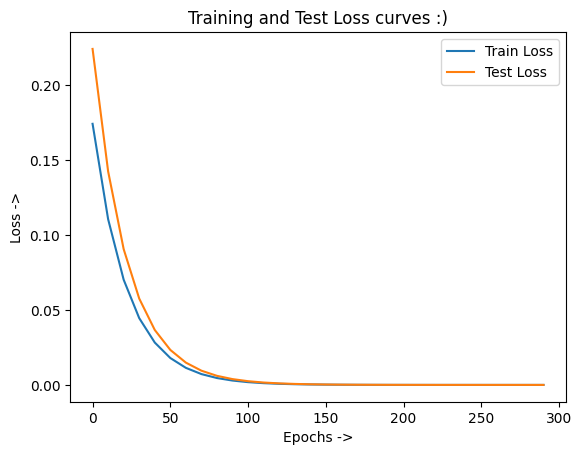

In [16]:
plt.plot(epoch_count, loss_value, label="Train Loss")
plt.plot(epoch_count, test_loss_value, label="Test Loss")
plt.title("Training and Test Loss curves :)")
plt.xlabel("Epochs ->")
plt.ylabel("Loss ->")
plt.legend();

In [17]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.8977]], device='cuda:0')),
             ('linear_layer.bias', tensor([1.2004], device='cuda:0'))])

In [18]:
loaded_model_1 = LinearRegressionModelV2()
loaded_model_1.to(device)
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [19]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.8977]], device='cuda:0')),
             ('linear_layer.bias', tensor([1.2004], device='cuda:0'))])

tensor([[1.8288],
        [1.8377],
        [1.8467],
        [1.8557],
        [1.8647],
        [1.8736],
        [1.8826],
        [1.8916],
        [1.9006],
        [1.9096],
        [1.9185],
        [1.9275],
        [1.9365],
        [1.9455],
        [1.9544],
        [1.9634],
        [1.9724],
        [1.9814],
        [1.9903],
        [1.9993],
        [2.0083],
        [2.0173],
        [2.0263],
        [2.0352],
        [2.0442],
        [2.0532],
        [2.0622],
        [2.0711],
        [2.0801],
        [2.0891]], device='cuda:0')

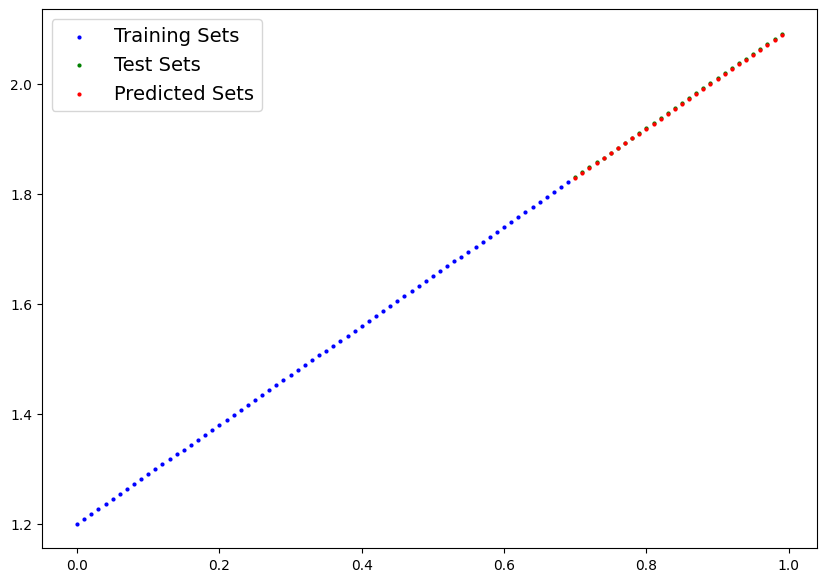

In [20]:
# Before running some predictions always change the model to eval mode
loaded_model_1.eval()

with torch.inference_mode():
  loaded_y_preds_1 = loaded_model_1(X_test)

plot_predictions(predictions=loaded_y_preds_1.cpu())
loaded_y_preds_1